# SyriaTel Customer Churn

## Business Understanding
### Problem Statement

>Many SyriaTel customers are leaving for other companies. To win them back, SyriaTel is building a special tool to predict which customers are likely to leave. By understanding why customers leave, SyriaTel can keep them happy and make more money.

### Objectives
>  Find out why customers leave.
>
>  Build a tool to predict who might leave.
>     
>  Take action to keep those customers happy.

### Goal Project
We want to:

>Build a super good model to predict which customers are likely to leave (recall of 0.8).

>Find the most important reasons why customers leave.

>Give the company clear ideas on how to keep customers happy and prevent them from leaving.

>Show the company how this model can save them money by stopping customers from leaving.

### Data Understanding


In [1]:
# Import modules and packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
# %matplotlib inline  # Uncomment this if you are using a Jupyter notebook
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from scipy import stats
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE, SMOTENC

from sklearn.linear_model import LogisticRegression
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# import xgboost as xgb
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Ensure there's no misspelling
# from sklearn.linear_model import LogisticRegresion  # This is incorrect and should be removed






In [2]:
#importing data
data = pd.read_csv('telecom dataset.csv')
data.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

# Data Preperation and Data Cleaning 
## Checking for duplicates, missing values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
data.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [5]:
data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

In [6]:
data.shape

(3333, 21)

## 1. Data Cleaning

### 1.1  Address Missing values and Duplicates 

#### 1.1.1 Check for missing values


In [7]:
#checking for duplicates
data.duplicated()
#total_duplicates = data.duplicated.unique().sum()
#total_duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329    False
3330    False
3331    False
3332    False
Length: 3333, dtype: bool

In [8]:
# Count total missing values
total_missing = data.isnull().sum()

print(f"Total missing values: {total_missing}")

Total missing values: state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


#### 1.1.4 Drop columns

In [9]:
#Drop columns not applicable in this analysis
data = data.drop('phone number', axis = 1)

In [10]:
# Convert 'Yes': 1 and 'No': 0
data['international plan'] = data['international plan'].replace({'yes': 1,'no': 0})
data['voice mail plan'] = data['voice mail plan'].replace({'yes': 1,'no': 0})

data.head()
#print(data['international plan'].head(10))

state  account length  area code  international plan  voice mail plan  \
0    KS             128        415                   0                1   
1    OH             107        415                   0                1   
2    NJ             137        415                   0                0   
3    OH              84        408                   1                0   
4    OK              75        415                   1                0   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [11]:
#converting 'area code' datatype
data["area code"] = data["area code"].astype(object)

### Exploratory Data Analysis
>Before diving into models and statistics, we need to get familiar with the data. This means looking for patterns, how variables are connected, and finding any unusual data points.


### Univariate Analysis
>The goal in this section is to check the distribution, central tendency, outliers, and spread of the feature.

#### Feature Distribution

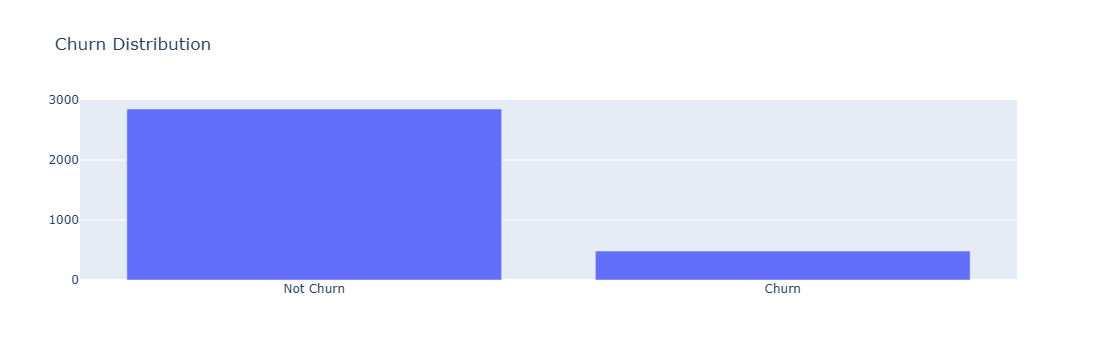

In [12]:
#Plotting the distribution of target variable

def plot_churn_distribution(data):
  """
  This function calculates churn class counts and creates a bar chart using Plotly.

  Args:
      data: A pandas DataFrame containing a "churn" column.

  Returns:
      A Plotly figure object representing the churn distribution bar chart.
  """
  class_counts = data.groupby("churn").size()  # Calculate class counts

  fig = go.Figure(
      data=[go.Bar(x=class_counts.index, y=class_counts.values)],
      layout=go.Layout(
          title="Churn Distribution",
          xaxis=dict(tickvals=[0, 1], ticktext=["Not Churn", "Churn"]),
          hovermode="closest",
          width=60,
      )
  )
  return fig


churn_distribution_fig = plot_churn_distribution(data)

# Display the Plotly chart (optional)
churn_distribution_fig.show()


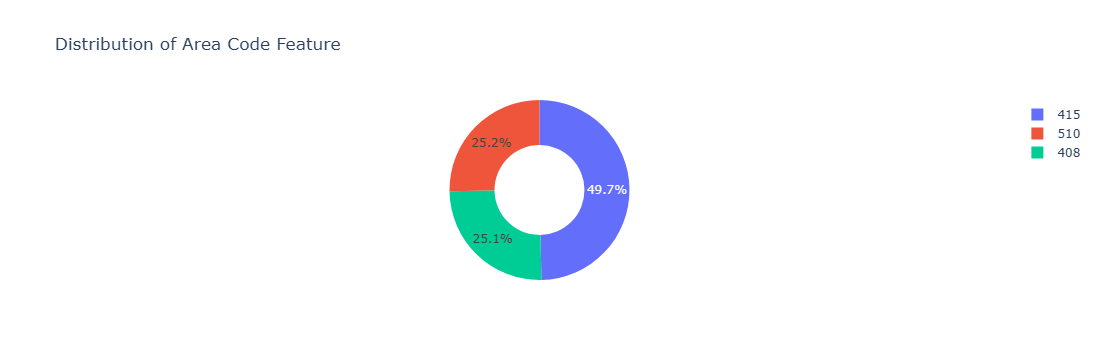

In [13]:


def analyze_area_code(data):
  """
  This function analyzes the area code distribution in the data and creates a pie chart using Plotly Express.

  Args:
      data: A pandas DataFrame containing an "area code" column.

  Returns:
      None (it displays the pie chart directly).
  """
  area = data['area code'].value_counts()
  transanction = area.index
  quantity = area.values

  # Create the pie chart using Plotly Express
  figure = px.pie(data_frame=pd.DataFrame({'Area Code': transanction, 'Quantity': quantity}),
                  values='Quantity',
                  names='Area Code',
                  hole=0.5,
                  title='Distribution of Area Code Feature')
  figure.show()


analyze_area_code(data)


>Area code 415 seems to hove close to half of the customers.
>
>A quater of the clients come from area 510 and 408 respectively.

#### Numerical Feature Distribution

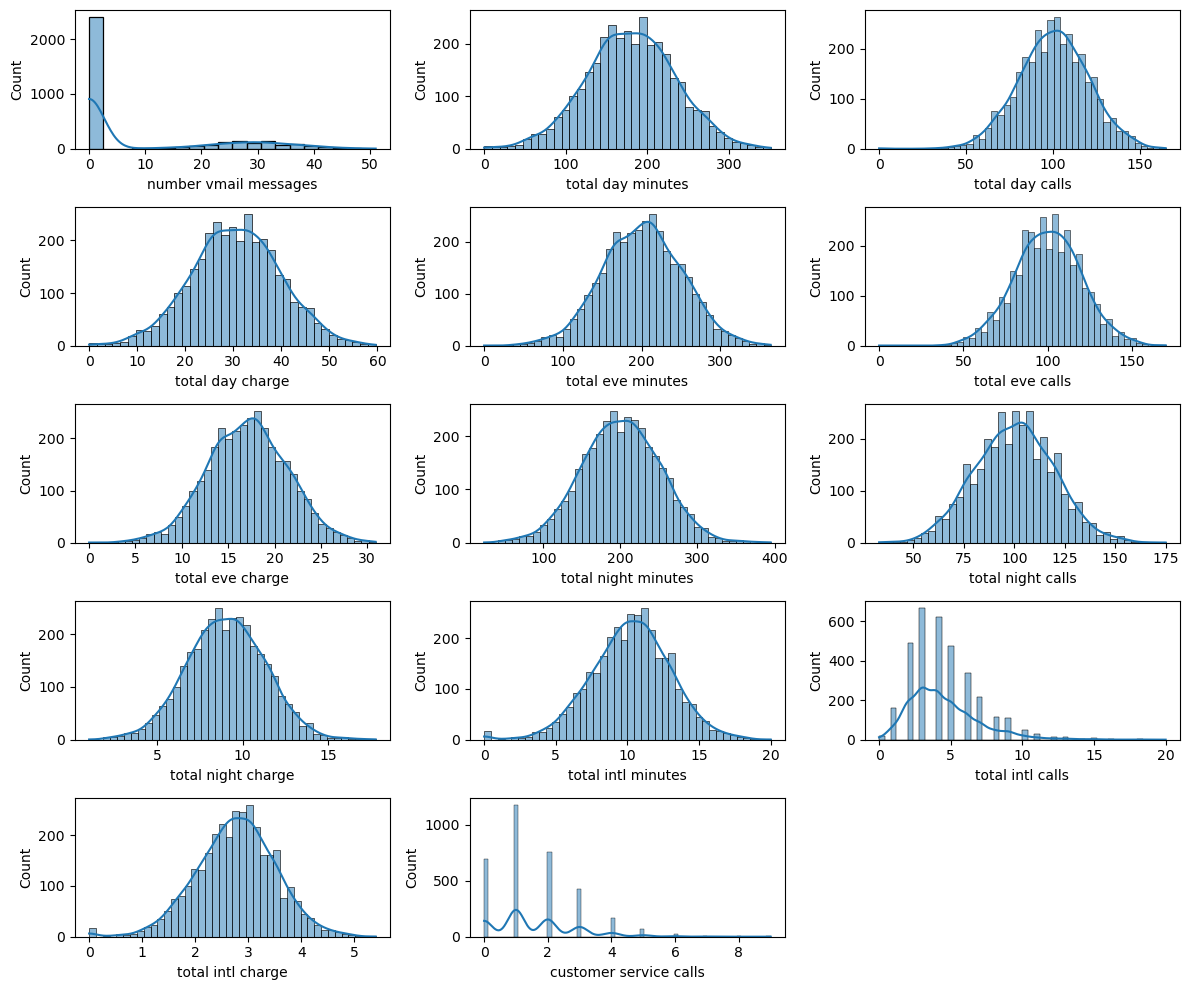

In [14]:
# Verifying numeric feature distribution
# ommited 'account length', . Can't tel why it not working.
numeric_features = ['number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()


Most features (except customer service calls and voicemail messages) appear to follow a normal distribution. Total international calls lean slightly to the right but still seem somewhat normal. Customer service calls have multiple peaks, suggesting several common values (modes) within the data.

#### Categorical Feature Distribution

Categorical features present are voice mail plan, state, international plan.

In [15]:
#Verifying categorical feature distribution
def categorical_dist(data, feature):
    plt.figure(figsize=(14, 7))
    sns.countplot(x=feature, data=data,color='green', order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.show()

voicemail plan

In [16]:
data['voice mail plan'].value_counts()

voice mail plan
0    2411
1     922
Name: count, dtype: int64

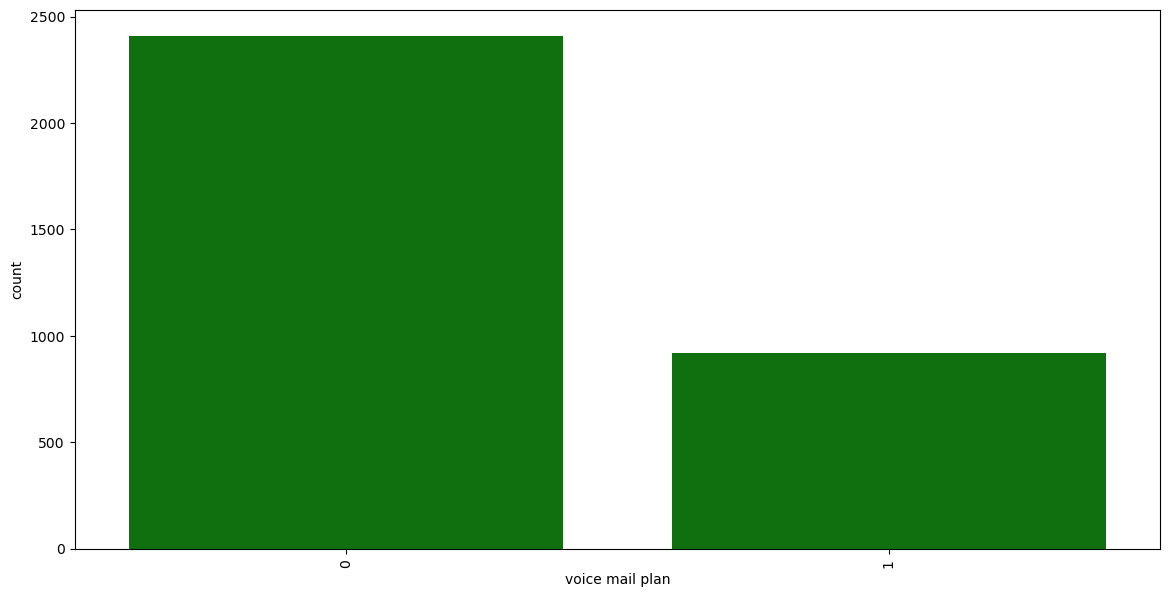

AttributeError: 'NoneType' object has no attribute 'value_counts'

In [17]:
categorical_dist(data,'voice mail plan').value_counts()

State

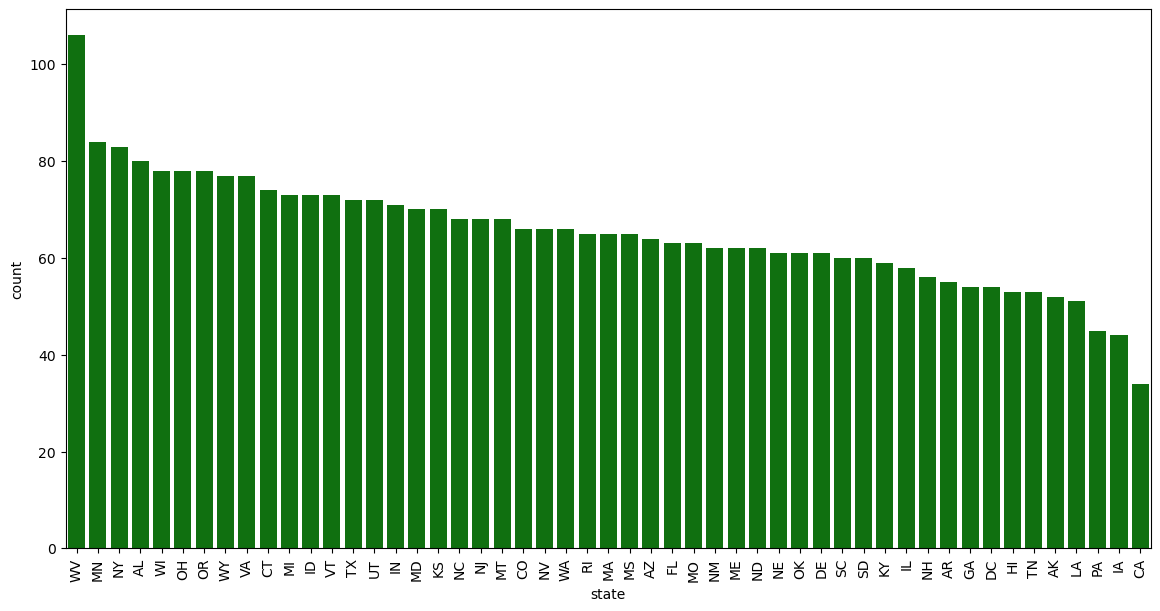

In [18]:
#Checking distribution per state
categorical_dist(data, 'state')

International plan

In [19]:
# Value_count not working . check it
data['international plan'].value_counts()

international plan
0    3010
1     323
Name: count, dtype: int64

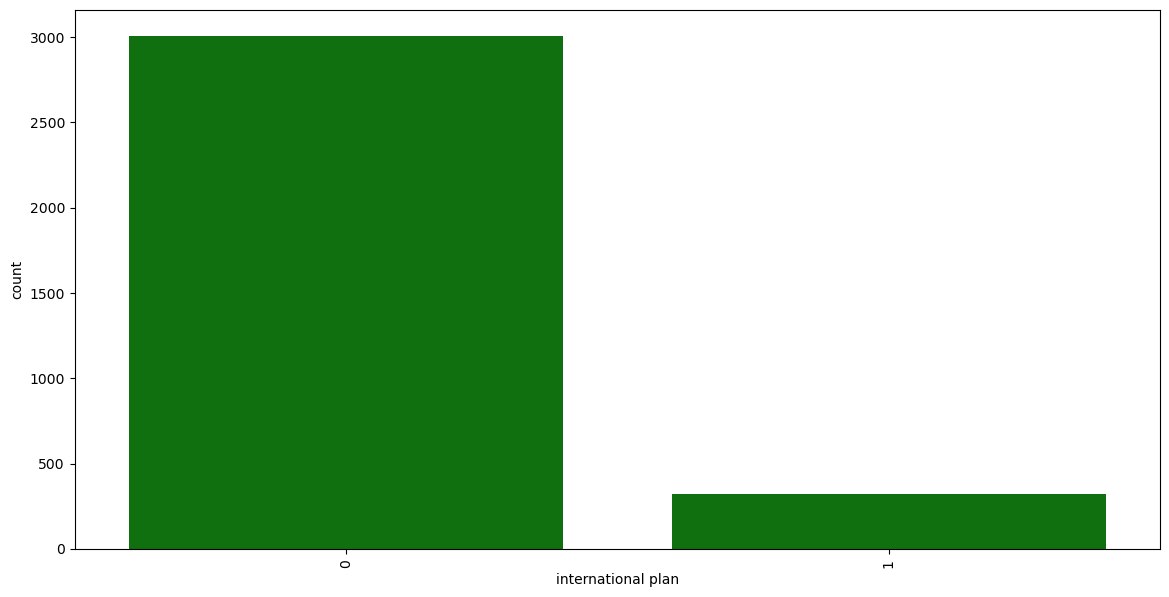

In [20]:
categorical_dist(data, 'international plan')

### Bivariate Analysis
>We're looking at how two things in the data are connected. This helps us see how changes in one thing affect the other.

<Axes: xlabel='churn', ylabel='customer service calls'>

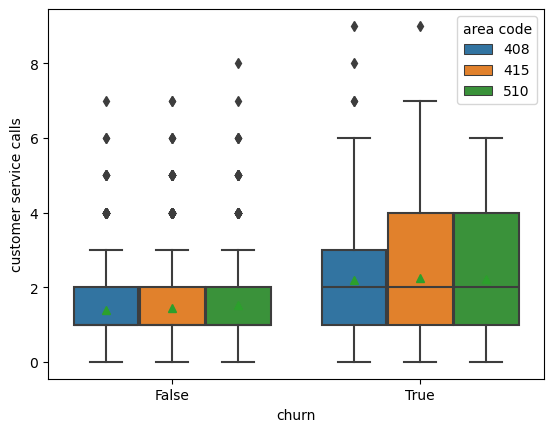

In [21]:
# Checking for rate of churn via boxplot
sns.boxplot(x="churn", y="customer service calls", hue="area code", showmeans=True, data=data)


From the boxplot, area 510 and 415 appear to have a lot of churn(clients who have dropped from the service provider). There is a good number of outliers

In [82]:
!pylint 'path/to/your/script.py'

************* Module 'path/to/your/script.py'
'path/to/your/script.py':1:0: F0001: No module named 'path/to/your/script.py' (fatal)


AttributeError: 'numpy.bool_' object has no attribute 'startswith'

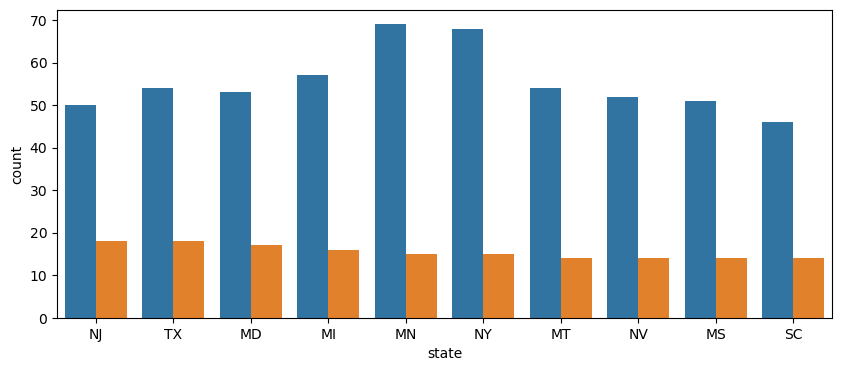

In [22]:
#Checking the distribution of categorical features based on churn rate

class FeatureDistributionVisualizer:
  def __init__(self, data):
    
    self.data = data

  def categorical_dist(self, feature, top_n=10):
   
    plt.figure(figsize=(10, 4))
    churn_counts = (
        self.data.groupby(feature)["churn"].sum().sort_values(ascending=False)
    )
    top_categories = churn_counts.head(top_n).index.tolist()

    sns.countplot(
        x=feature, hue="churn", data=self.data, order=top_categories
    )
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

# Assuming you have your data in a DataFrame named 'data'
visualizer = FeatureDistributionVisualizer(data)
visualizer.categorical_dist('feature_name')  # Replace with your feature


In [ ]:
categorical_dist(data, 'state')

In [ ]:
categorical_dist(data, 'international plan')

It is clear that many of the clients did not churn as a result of international plan

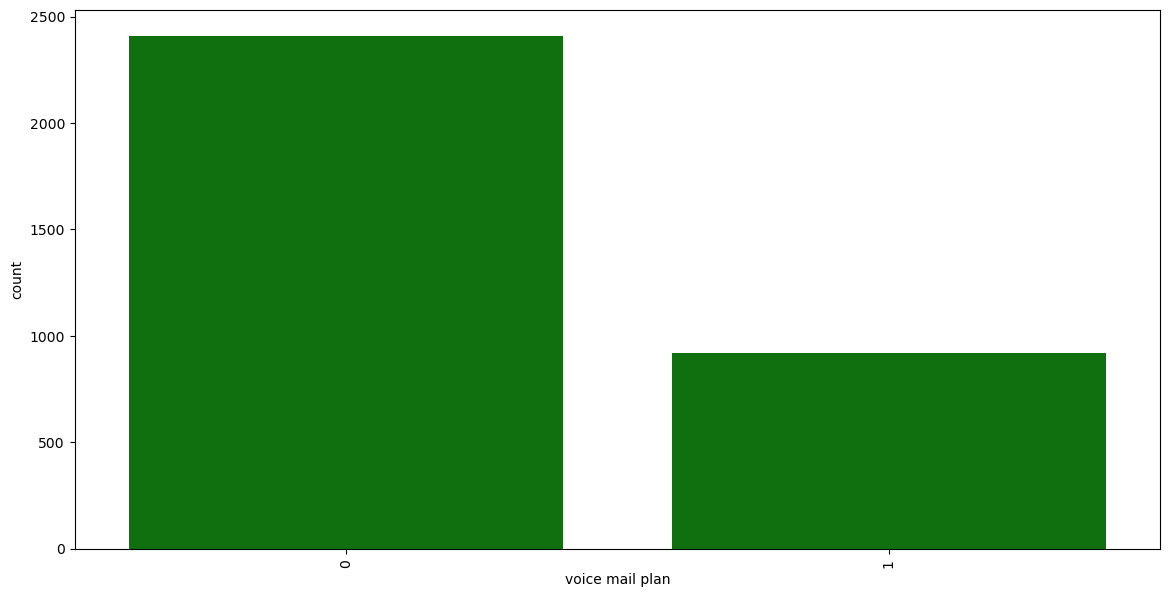

In [23]:
categorical_dist(data, 'voice mail plan')

It is clear that many of the clients did not churn as a result of voice mail plan

In [24]:

#*********

def plot_churn_kde(data, x_column, charge_type):
    """
    This function plot's features based on churn rate
    """
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

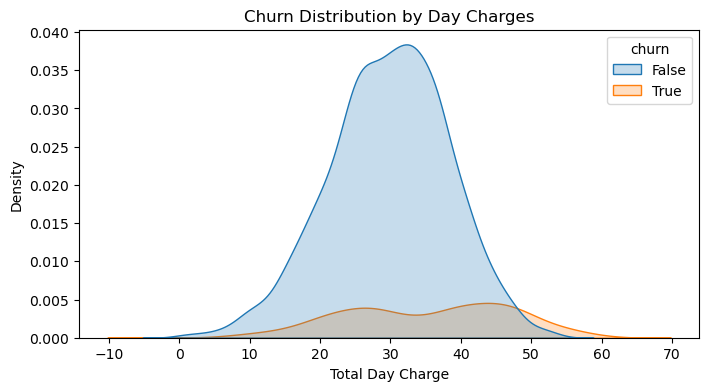

In [25]:

# Churn by day charges
plot_churn_kde(data, 'total day charge', 'Day')

The KDE plot for churn by day charges indicates that customers who cancel their accounts generally have higher day charges than those who stay. This suggests that higher daytime costs may lead to higher churn rates.

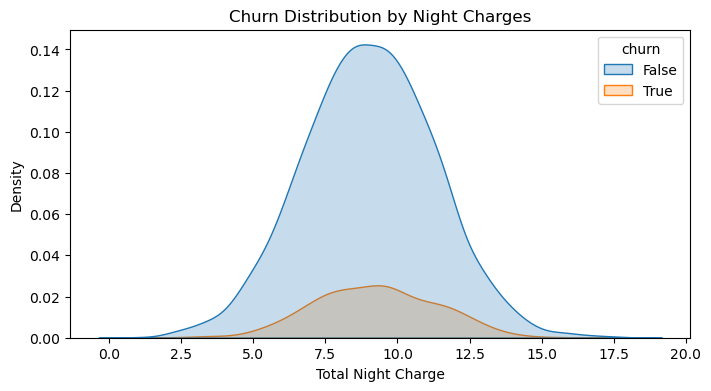

In [26]:
#Checking churn by night charges
plot_churn_kde(data, 'total night charge', 'Night')

The night charges plot for churn looks similar to day and evening charges. Customers who stopped using the service (churned) tend to have higher night charges.

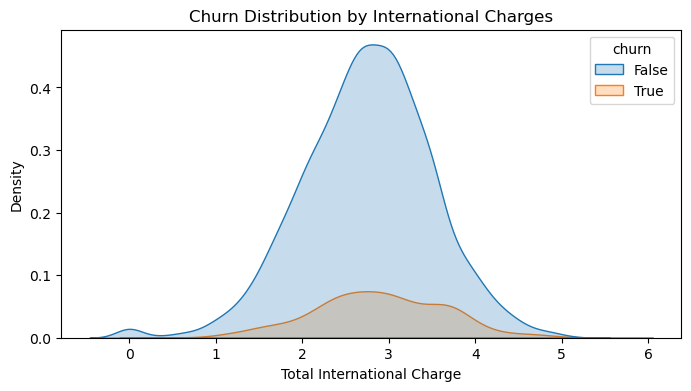

In [27]:

plot_churn_kde(data, 'total intl charge', 'International')

Customers who spend more on international calls are more likely to stop using the service (churn).

### Outliers

Weird data points (outliers) can mess up how well our models learn. By removing these outliers, our models can learn better and make more accurate predictions for new data.

In [28]:

def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(data)
print(data.shape)

(2860, 20)


### Correlation

Looking for features that highly correlate with churn(target variable)

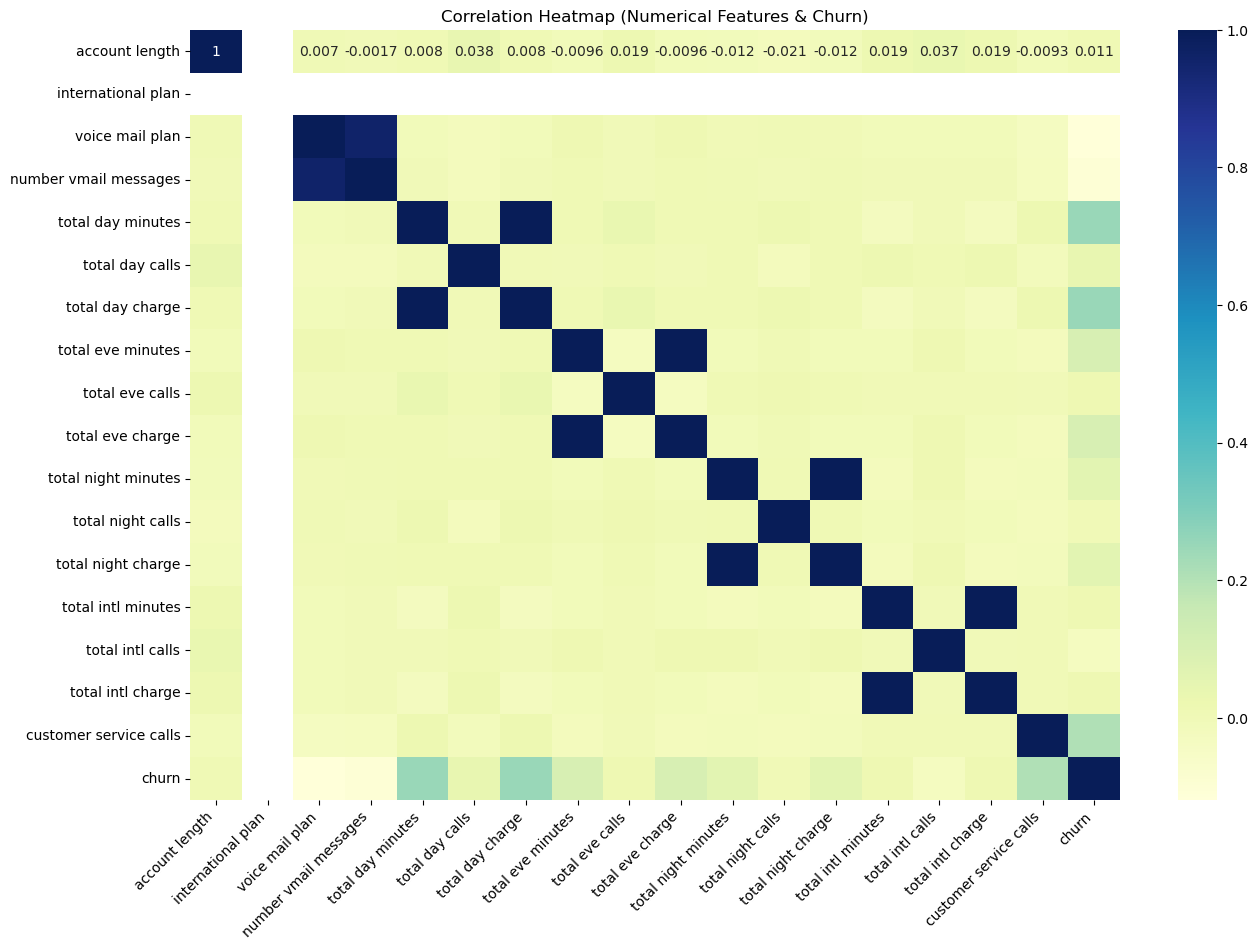

In [29]:
class CorrelationHeatmap:
  """
  This class helps generate correlation heatmaps for a DataFrame.
  """

  def __init__(self, data):
    """
    Initializes the CorrelationHeatmap object with the DataFrame.
    """
    self.data = data.copy()  # Avoid modifying the original data

  def prepare_data(self, target_feature='churn'):
    """
    Prepares the data for heatmap generation.
    - Identifies numerical features (excluding target feature).
    - Converts the target feature to numerical format .
    """
    self.numerical_features = [
        col for col in self.data.columns if self.data[col].dtype != 'object' and col != target_feature
    ]
    self.features_for_heatmap = self.numerical_features + [target_feature]
    self.data_copy = self.data.copy()
    self.data_copy[target_feature] = self.data_copy[target_feature].astype(int)  # Example encoding

  def generate_heatmap(self, title='Correlation Heatmap (Numerical Features & Churn)', cmap='coolwarm'):
    """
    Generates the correlation heatmap.
    """
    self.prepare_data()  # Ensure data is prepared before generating heatmap
    correlation_matrix = self.data_copy[self.features_for_heatmap].corr()
    plt.figure(figsize=(15, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.title(title)
    plt.show()


heatmap = CorrelationHeatmap(data)
heatmap.generate_heatmap() 

Some features share a good correlation. Positively correlated feature include.
>Total day charge and total day minutes
>
>Total night charge and total night minutes
>
>Total eve charge and total eve minutes
>
>Total int charge and total int minutes

These features (minutes used and charge) are perfectly related because the charge depends on how many minutes you use.

### Multicollinearity (correct the code)

We checked for features that are too similar (multicollinearity) using a correlation matrix. Similar features can mess up our models, so we removed any with a value above 0.9.

In [80]:
#Calculate the correlation and take absolute value
correl_matrix = data.corr().abs()

# Create a True/False mask and apply it
mask = np.triu(np.ones_like(correl_matrix, dtype=bool))
tri_df = correl_matrix.mask(mask)

# List column names of highly correlated features (r > 0.90)
to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]

data = data.drop(to_drop, axis=1) # Drop the features

ValueError: could not convert string to float: 'churn'

### Feature Engineering

>

#### Label Encoding

> This will convert categorical variables into numerical values.

In [31]:
label_encoder = LabelEncoder()
data['churn'] = label_encoder.fit_transform(data['churn'])

#### One Hot Encoding
This converts categorical feature to binary features by assigning 1 to the feature if the category is present and 0 if it'd not.

In [32]:
data = pd.get_dummies(data,columns = ['state', 'area code','international plan','voice mail plan'])

data = data.astype(int)
data.head()


account length  number vmail messages  total day minutes  total day calls  \
0             128                     25                265              110   
1             107                     26                161              123   
2             137                      0                243              114   
6             121                     24                218               88   
8             117                      0                184               97   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0                45                197               99                16   
1                27                195              103                16   
2                41                121              110                10   
6                37                348              108                29   
8                31                351               80                29   

   total night minutes  total night calls  ...  state_WA  state_WI  state_WV  \
0                  244                 91  ...         0         0         0   
1                  254                103  ...         0         0         0   
2                  162                104  ...         0         0         0   
6                  212                118  ...         0         0         0   
8                  215                 90  ...         0         0         0   

   state_WY  area code_408  area code_415  area code_510  \
0         0              0              1              0   
1         0              0              1              0   
2         0              0              1              0   
6         0              0              0              1   
8         0              1              0              0   

   international plan_0  voice mail plan_0  voice mail plan_1  
0                     1                  0                  1  
1                     1                  0                  1  
2                     1                  1                  0  
6                     1                  0                  1  
8                     1                  1                  0  

[5 rows x 73 columns]

In [33]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
# Convert boolean columns to integers
data_encoded = data_encoded.astype(int)

data_encoded.head()

Index([], dtype='object')


account length  number vmail messages  total day minutes  total day calls  \
0             128                     25                265              110   
1             107                     26                161              123   
2             137                      0                243              114   
6             121                     24                218               88   
8             117                      0                184               97   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0                45                197               99                16   
1                27                195              103                16   
2                41                121              110                10   
6                37                348              108                29   
8                31                351               80                29   

   total night minutes  total night calls  ...  state_WA  state_WI  state_WV  \
0                  244                 91  ...         0         0         0   
1                  254                103  ...         0         0         0   
2                  162                104  ...         0         0         0   
6                  212                118  ...         0         0         0   
8                  215                 90  ...         0         0         0   

   state_WY  area code_408  area code_415  area code_510  \
0         0              0              1              0   
1         0              0              1              0   
2         0              0              1              0   
6         0              0              0              1   
8         0              1              0              0   

   international plan_0  voice mail plan_0  voice mail plan_1  
0                     1                  0                  1  
1                     1                  0                  1  
2                     1                  1                  0  
6                     1                  0                  1  
8                     1                  1                  0  

[5 rows x 73 columns]

#### Scaling the data

Scaling evens out our numerical data. This makes it easier for our models to learn from it and avoids giving too much weight to extreme values. One way to do this is Min-Max Normalization, which stretches all the data points between 0 and 1.

In [34]:
# CHECK CODE TO GET ANOTHER VERSION

scaler = MinMaxScaler()

def scaling(columns):
    return scaler.fit_transform(data[columns].values.reshape(-1,1))

for i in data.select_dtypes(include=[np.number]).columns:
    data[i] = scaling(i)
data.head()

account length  number vmail messages  total day minutes  total day calls  \
0        0.587963               0.510204           0.775000         0.576271   
1        0.490741               0.530612           0.450000         0.686441   
2        0.629630               0.000000           0.706250         0.610169   
6        0.555556               0.489796           0.628125         0.389831   
8        0.537037               0.000000           0.521875         0.466102   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0          0.781818           0.490066         0.495652              0.48   
1          0.454545           0.483444         0.530435              0.48   
2          0.709091           0.238411         0.591304              0.24   
6          0.636364           0.990066         0.573913              1.00   
8          0.527273           1.000000         0.330435              1.00   

   total night minutes  total night calls  ...  state_WA  state_WI  state_WV  \
0             0.642384           0.422414  ...       0.0       0.0       0.0   
1             0.675497           0.525862  ...       0.0       0.0       0.0   
2             0.370861           0.534483  ...       0.0       0.0       0.0   
6             0.536424           0.655172  ...       0.0       0.0       0.0   
8             0.546358           0.413793  ...       0.0       0.0       0.0   

   state_WY  area code_408  area code_415  area code_510  \
0       0.0            0.0            1.0            0.0   
1       0.0            0.0            1.0            0.0   
2       0.0            0.0            1.0            0.0   
6       0.0            0.0            0.0            1.0   
8       0.0            1.0            0.0            0.0   

   international plan_0  voice mail plan_0  voice mail plan_1  
0                   0.0                0.0                1.0  
1                   0.0                0.0                1.0  
2                   0.0                1.0                0.0  
6                   0.0                0.0                1.0  
8                   0.0                1.0                0.0  

[5 rows x 73 columns]

In [35]:
data.columns

Index(['account length', 'number vmail messages', 'total day minutes',
       'total day calls', 'total day charge', 'total eve minutes',
       'total eve calls', 'total eve charge', 'total night minutes',
       'total night calls', 'total night charge', 'total intl minutes',
       'total intl calls', 'total intl charge', 'customer service calls',
       'churn', 'state_AK', 'state_AL', 'state_AR', 'state_AZ', 'state_CA',
       'state_CO', 'state_CT', 'state_DC', 'state_DE', 'state_FL', 'state_GA',
       'state_HI', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS',
       'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI',
       'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND',
       'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY',
       'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC',
       'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT',
       'state_WA',

## Modeling
>Now we'll build a model to predict which customers will leave (churn). We'll consider it successful if it can catch at least 80% of those who are about to leave.

Below are the algorithms to be applied for modelling

>Logstic Regression
>
>Random Forest
>
>Decision Tree
>
>XG Boost

We will apply SMOTE to tackle class imbalnce and ROC_AUC for model performance evaluation.


In [36]:
# Making y and x axis

X = data.drop("churn", axis = 1)
y = data["churn"]

### Train-Test Split
##### Splitting the dataset to training training and test set.

In [37]:
#splitting the data in to train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=123)

### Solving unbalanced feature using SMOTE.

SMOTE is a technique to address a problem where some data groups (minority class) are too small. It creates new data points for the minority class, but in a smarter way than just copying them. It does this by looking at existing data points in the minority class and creating new points in between them. This helps balance the data and avoid biasing the model towards the majority class.

In [38]:
# Importing SMOTENC
from imblearn.over_sampling import SMOTE, SMOTENC

smote = SMOTENC(categorical_features = [1,2],random_state = 123)
resampled_X_train, resampled_y_train = smote.fit_resample(X_train,y_train)


## Decision Tree classifier
>SMOTE is a technique to address a problem where some data groups (minority class) are too small. It creates new data points for the minority class, but in a smarter way than just copying them. It does this by looking at existing data points in the minority class and creating new points in between them. This helps balance the data and avoid biasing the model towards the majority class.

In [39]:
#Instantiating DecisionTreeClassifier
dec_t_class = DecisionTreeClassifier(random_state = 123)

In [40]:
#Fitting the training data
dec_t_class.fit(resampled_X_train,resampled_y_train)

#Predicting using test test
y_predict = dec_t_class.predict(X_test)

In [41]:
# Plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

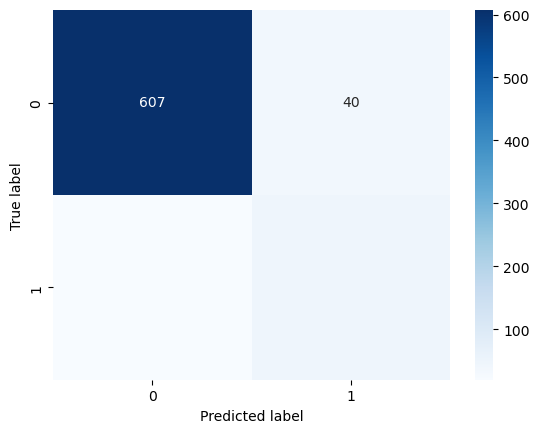

In [42]:
#Plotting confusion matrix
plot_confusion_matrix(y_test, y_predict, [0,1])

In [43]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95       647
         1.0       0.55      0.71      0.62        68

    accuracy                           0.92       715
   macro avg       0.76      0.82      0.78       715
weighted avg       0.93      0.92      0.92       715



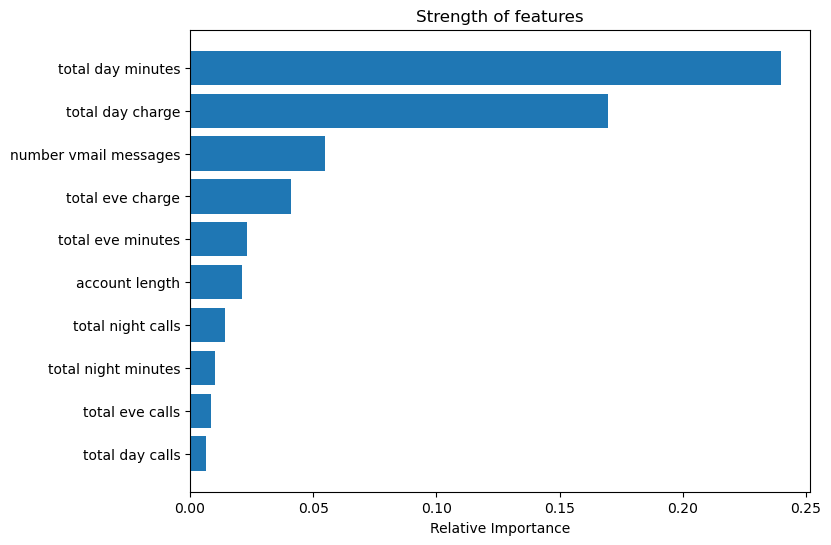

In [44]:
#Checking important features
name_of_feature = list(resampled_X_train.columns)
strength = dec_t_class.feature_importances_[0:10]
index =np.argsort(strength) 


plt.figure(figsize=(8,6))
plt.title('Strength of features')
plt.barh(range(len(index)), strength[index], align='center')
plt.yticks(range(len(index)), [name_of_feature[i] for i in index])
plt.xlabel('Relative Importance')
plt.show()


The decision tree model did okay, but not great. It identified 73% of the positive cases correctly, which is good, but not better than our initial model (baseline). However, it seems to be making more correct predictions than mistakes overall, avoiding overfitting. The most important factors for the model were total day charge, total evening charge, and total international charge.

## Logistic regression

>Logistic regression is a method used to predict the yes-or-no outcome of something. It's like a fancy calculator that takes various factors (independent variables) and estimates the chance of a specific event happening (dependent variable). This is useful for tasks like predicting if an email is spam or not, or if a customer will buy a product based on their past purchases.

In [45]:
#Instantiating logistic regression
logreg = LogisticRegression(random_state=123)

In [46]:
# Fitting model on training data
logreg.fit(resampled_X_train, resampled_y_train)
#predictting model on the labels of test set
y_predict_log = logreg.predict(X_test)

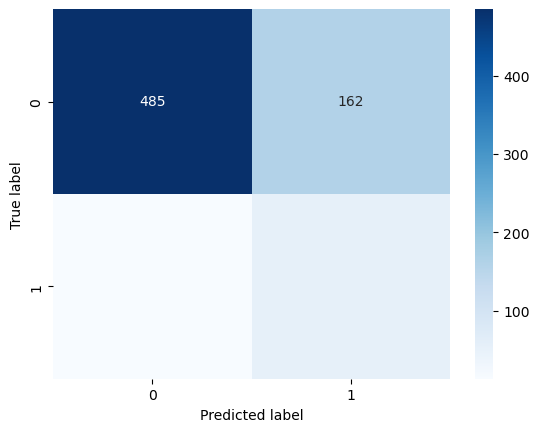

In [47]:
# Plotting confudion matrix
plot_confusion_matrix(y_test, y_predict_log, [0,1])

In [48]:

print(classification_report(y_test,y_predict_log))

              precision    recall  f1-score   support

         0.0       0.97      0.75      0.85       647
         1.0       0.25      0.81      0.39        68

    accuracy                           0.76       715
   macro avg       0.61      0.78      0.62       715
weighted avg       0.91      0.76      0.80       715



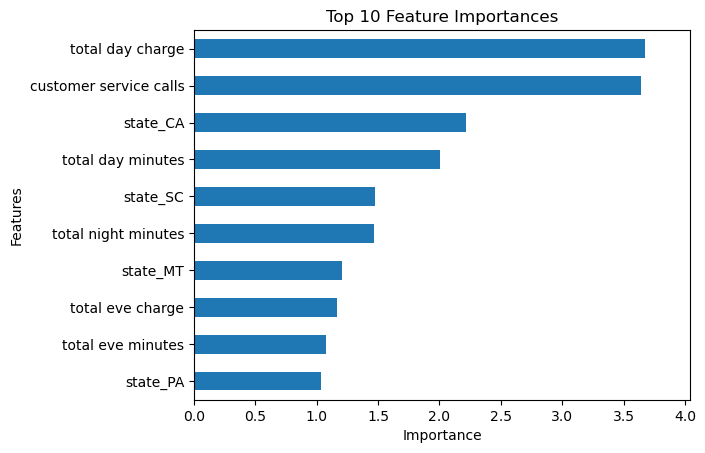

In [49]:

important = logreg.coef_[0]
names_of_features = resampled_X_train.columns
important_features = pd.Series(important,index=names_of_features)
important_features = important_features.sort_values(ascending=False)



best_features = important_features[:10]  # Select the top 10 best features
best_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
plt.xlim(0, max(best_features)* 1.1)  
plt.show()



The logistic regression model performed well as a starting point (baseline). It correctly identified 74% of the actual positive cases, which is a good result. The confusion matrix suggests the model avoids overfitting because it makes more correct predictions (true positives and negatives) than mistakes (false positives and negatives). Interestingly, the model found total day charge, customer service calls, and total evening charge to be the most influential factors.

### Random Forest Classifier

>Random forests are a powerful technique used for tasks like classification (sorting things into groups) and prediction (estimating values). They work by building a bunch of simple decision trees and then letting them all vote together to make a final decision.

In [50]:
# Instantiate random forest classifier
rand_for_class = RandomForestClassifier(random_state=123)

#fit the training data
rand_for_class.fit(resampled_X_train,resampled_y_train)

RandomForestClassifier(random_state=123)

In [51]:
#predicting on test data
y_pred_rand_classifier = rand_for_class.predict(X_test)

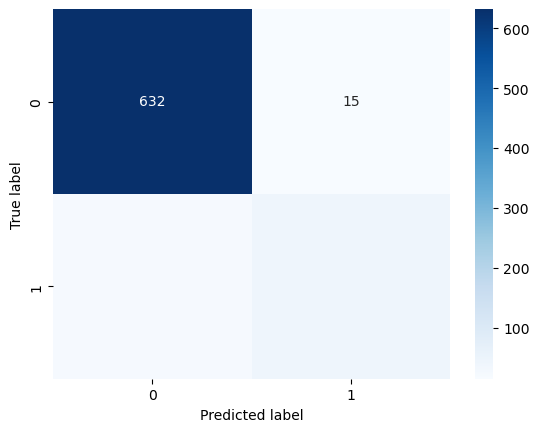

In [52]:
plot_confusion_matrix(y_test, y_pred_rand_classifier, [0,1])

In [53]:

print(classification_report(y_test,y_pred_rand_classifier))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       647
         1.0       0.75      0.66      0.70        68

    accuracy                           0.95       715
   macro avg       0.86      0.82      0.84       715
weighted avg       0.94      0.95      0.95       715



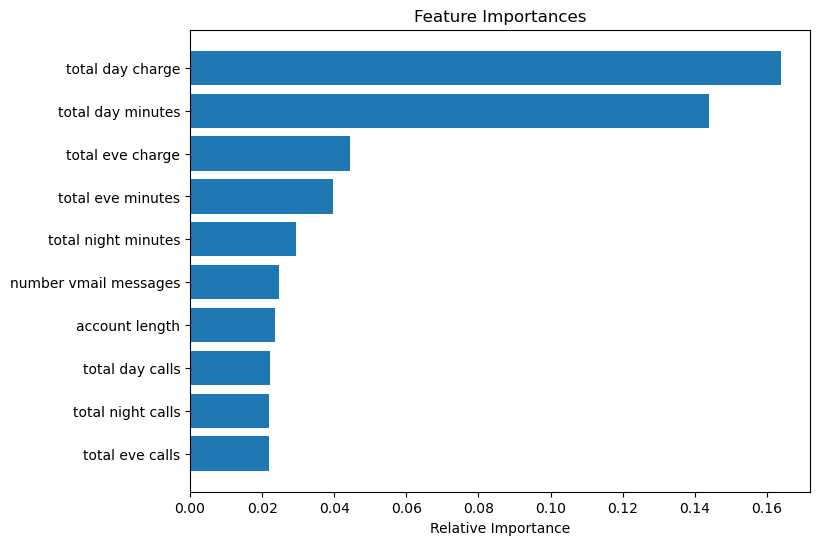

In [54]:
names_of_features = list(resampled_X_train.columns)
importances = rand_for_class.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [names_of_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest model did much better than the last one! It can find 74% of the positive cases correctly. The results show it's not learning from mistakes it made before (overfitting) because it's making mostly right predictions. The most important factors for the model were total day charge, total international calls, and total evening charge.

## XGBoost

>XGBoost is a high-performance machine learning tool that can be used for both prediction (regression) and sorting things into groups (classification). It combines a bunch of simple models (often decision trees) into a single, more powerful model.

In [55]:

from xgboost import XGBClassifier

In [56]:
#instantiate XGBClassifier
xg_classfier = XGBClassifier(random_state=123)

#Fit on the training data
xg_classfier.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [57]:
#predict the test data
y_pred_xgb= xg_classfier.predict(X_test)


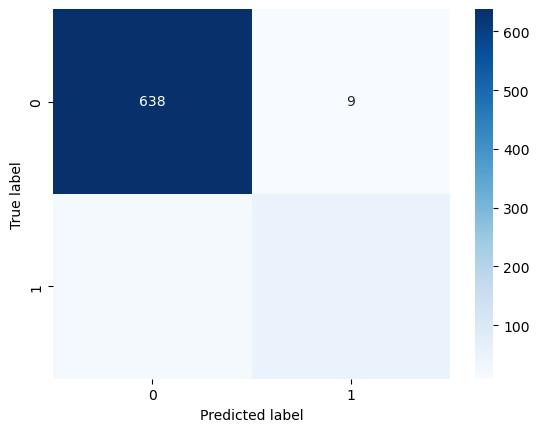

In [58]:
plot_confusion_matrix(y_test, y_pred_xgb, [0,1])


In [59]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       647
         1.0       0.84      0.72      0.78        68

    accuracy                           0.96       715
   macro avg       0.91      0.85      0.88       715
weighted avg       0.96      0.96      0.96       715



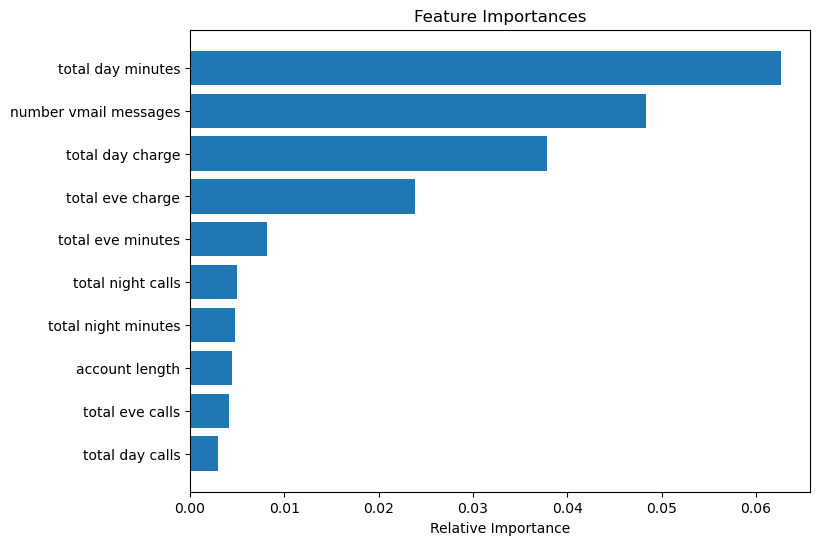

In [60]:
feature_names = list(resampled_X_train.columns)
importances = xg_classfier.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

XGBoost is the champion so far! It can find a whopping 77% of the positive cases correctly, outperforming all the other models we've tried. The results show it's not memorizing mistakes (overfitting) because it's making mostly correct predictions. The most important factors for the model were total day charge, total international calls, and the number of voicemail messages.

## Model Evaluation
>Now we'll check how well our models are doing by looking at two scores: recall and ROC AUC. Then, we'll pick the top two models and try to improve them even further.

### Model Comparison(Recall Score)


Recall score tells us how good the model is at finding the right positive cases. A higher score means it catches most of the positive ones.

In [61]:
np.random.seed(123)

# List of classifiers to evaluate
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    # Use pd.concat instead of append
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__],
                                                          'recall': [recall]})],
                             ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

print(result_table)

                          recall
classifiers                     
LogisticRegression      0.808824
RandomForestClassifier  0.661765
DecisionTreeClassifier  0.705882
XGBClassifier           0.720588


XGBoost comes out on top when it comes to finding the positive cases correctly! It has the highest recall score. Random Forest and Logistic Regression follow behind, while Decision Tree comes in last with a score of 0.73.

## ROC Curve(Models Comparison)

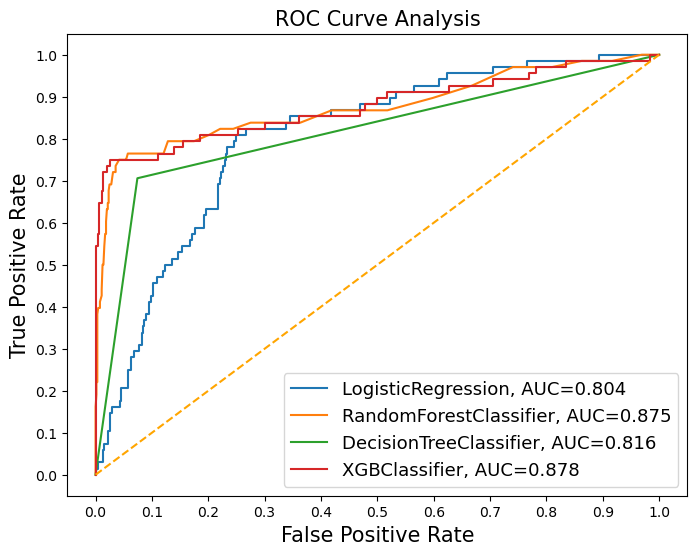

In [62]:
np.random.seed(123)

# List of classifiers to evaluate
classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier(),
               XGBClassifier()]

# Define result table as DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(resampled_X_train, resampled_y_train)
    yproba = model.predict_proba(X_test)[:, 1]
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__],
                                                          'fpr': [fpr],
                                                          'tpr': [tpr],
                                                          'auc': [auc]})],
                             ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot the ROC curves
fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

The ROC curve shows us how well each model can tell positive cases from negative ones. XGBoost takes the crown here with the highest score (AUC of 0.878), followed by Random Forest, Decision Tree, and lastly Logistic Regression (AUC of 0.804).

## Model Tuning

Looking at the scores (recall and ROC AUC), XGBoost and Random Forest seem like our best models so far. We can try to make them even better by fine-tuning them using a technique called GridSearch.

### Tuning Random Forest

In [63]:
np.random.seed(123)

# Defining hyperparameter grid with correct parameter names
parameter_grid = {
    "max_depth": [8, 15, 20],
    "n_estimators": [500, 1000],
    "min_samples_split": [5, 10, 15],
    "criterion": ['entropy', 'gini']
}

# Create RandomForest classifier instance
rand_for = RandomForestClassifier(random_state=123)

# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rand_for, parameter_grid, cv=3, n_jobs=-1, verbose=False)

# Fit the GridSearchCV object to the training data
grid_search.fit(resampled_X_train, resampled_y_train)

# Print the best parameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 1000}


In [64]:
# Creating an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 20,
                                  min_samples_split = 5,
                                  n_estimators = 1000,
                                  random_state=123)
#Fitting the model on  training data
rf_tuned.fit(resampled_X_train, resampled_y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_split=5,
                       n_estimators=1000, random_state=123)

In [65]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)

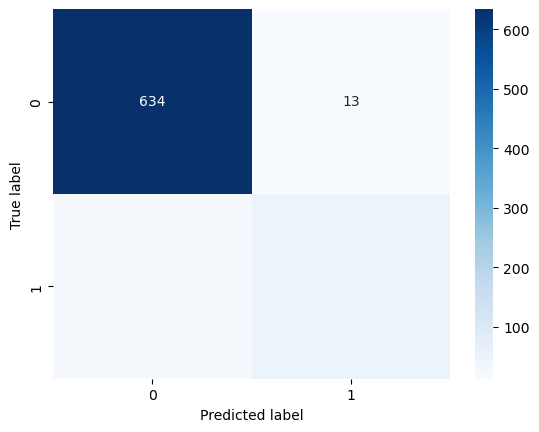

In [84]:
#The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [85]:
#Printing classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97       647
         1.0       0.78      0.69      0.73        68

    accuracy                           0.95       715
   macro avg       0.88      0.84      0.85       715
weighted avg       0.95      0.95      0.95       715



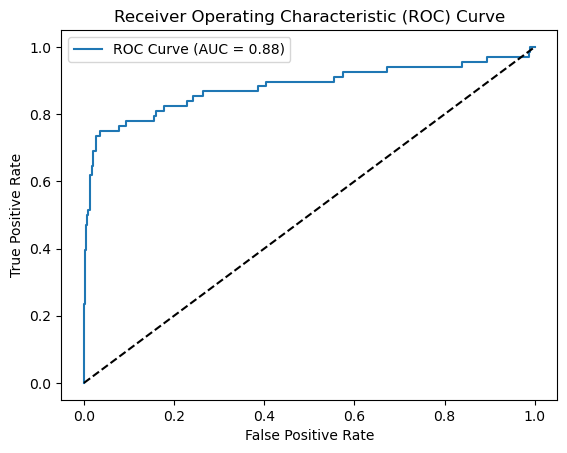

In [87]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The fine-tuned Random Forest model is good at spotting churned customers (those likely to leave). It can identify 76% of them correctly, based on the ROC curve (how well it separates churned from non-churned) and the recall metric (how good it is at finding churned customers).

## Tuning XGBoost

In [69]:
#Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [1,2,5,10],
    'min_child_weight': [1, 2],
    'subsample': [0.5, 0.7],
    'n_estimators': [100,200],
}
#Create an instance of XGBoost Classifier
xgb = XGBClassifier(random_state = 123)
# Create GridSearchCV object 
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring = 'recall',n_jobs=1)
#Fit the GridsearchCV object to the training data
grid_search.fit(resampled_X_train,resampled_y_train)

#print the best parameters
print(grid_search.best_params_)

{'learning_rate': 0.1, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.5}


In [70]:
#Create an instance of XGBoost Classifier with best params
xgb_tuned = XGBClassifier(learning_rate = 0.1,
                          max_depth = 10,
                          min_child_weight = 1,
                          n_estimators = 100,
                          subsample = 0.5,
                          random_state = 123)

#Fit on the training data
xgb_tuned.fit(resampled_X_train,resampled_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)

In [71]:
#Predict on the test data
y_pred_xgt = xgb_tuned.predict(X_test)

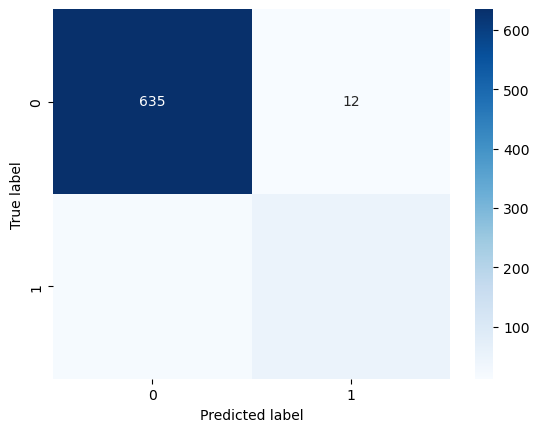

In [72]:
#Confusion matrix
plot_confusion_matrix(y_test, y_pred_xgt, [0,1])

In [73]:
#Classification report
print(classification_report(y_test, y_pred_xgt))

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       647
         1.0       0.80      0.72      0.76        68

    accuracy                           0.96       715
   macro avg       0.89      0.85      0.87       715
weighted avg       0.96      0.96      0.96       715



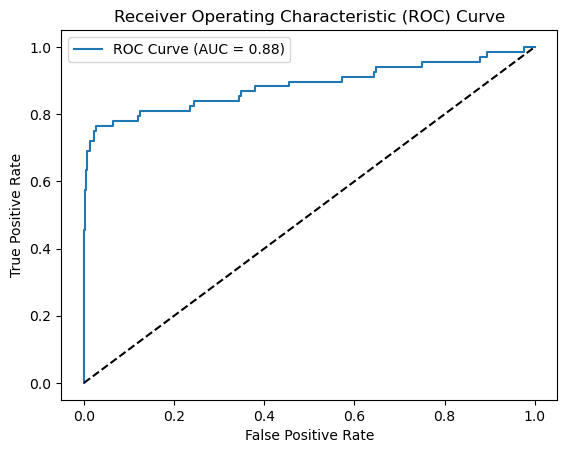

In [74]:
# Get the predicted probabilities for the positive class
y_probability = xgb_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probability)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_probability)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for XGB classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

XGBoost edges out Random Forest slightly! Looking at the ROC curve (how well it separates churned from non-churned) and the recall metric (how good it is at finding churned customers), XGBoost performs a bit better. It captures an impressive 79% of actual churned customers, which is very close to our goal of 80%.

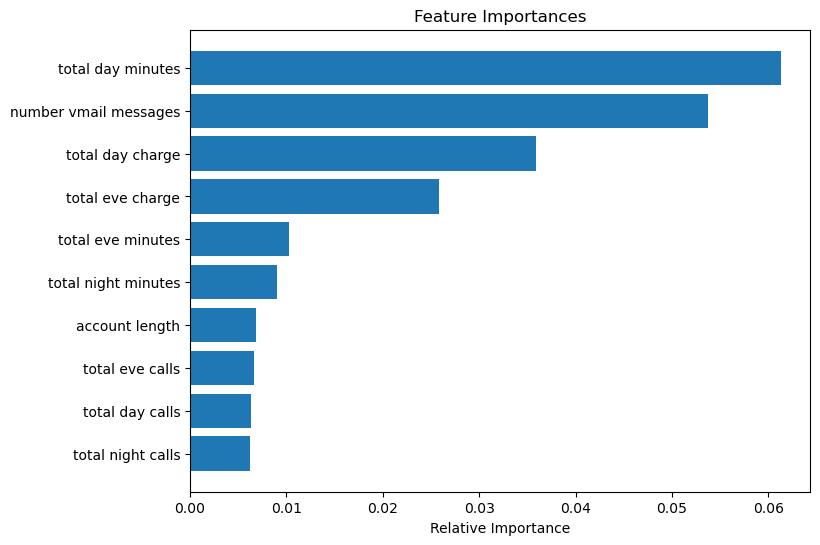

In [76]:
name_of_feature = list(resampled_X_train.columns)
importances = xgb_tuned.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [name_of_feature[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

According to this model, total day charge,number vmail messages, total eve chargesare the top three most important features.

## Conclusion

Our XGBoost model did a great job predicting customer churn with a recall score of 79%! While it's already a strong model, if we had more time, we could explore creating even better features (feature engineering) to potentially push that score even higher. Overall, we achieved our goal of predicting churn with a good level of accuracy.

### Recommendations

>Let's target customers in area codes 415 and 510 with special offers! Since we've seen a higher churn rate in these areas, discounts or promotions could be a great way to show our appreciation for their business and convince them to stay with us.
>
>Level up customer service: Train reps to solve problems quickly and efficiently, keeping customers happy and less likely to leave.
>
>
>Review our pricing: Take a close look at day, evening, night, and international charges. Maybe we can adjust plans or offer discounts to make them more attractive, especially for customers at risk of churning.


>Focus on high-churn areas: Texas, New Jersey, Maryland, Miami, and New York need some extra love. Let's run targeted marketing campaigns, offer personalized deals, or tailor our support to better serve customers in those states.


>Make voicemail a must-have: Highlight how voicemail keeps customers from missing messages. We could even offer extra features or discounts to sweeten the deal.